In [35]:
pip install polars


Note: you may need to restart the kernel to use updated packages.


In [74]:
import polars as pl
import matplotlib.pyplot as plt

In [37]:
HDI_df=pl.read_csv('HDI Rank2021.csv')
HDI_df

HDI rank,Country,Human Development Index (HDI Value),Life expectancy at birth (years),Expected years of schooling (years),Mean years of schooling (years),Gross national income (GNI) per capita (2017 PPP $),GNI per capita rank minus HDI rank
i64,str,f64,f64,f64,f64,str,i64
1,"""Switzerland""",0.962,84.0,16.5,13.9,"""66,933""",5
2,"""Norway""",0.961,83.2,18.2,13.0,"""64,660""",6
3,"""Iceland""",0.959,82.7,19.2,13.8,"""55,782""",11
4,"""Hong Kong, Chi…",0.952,85.5,17.3,12.2,"""62,607""",6
5,"""Australia""",0.951,84.5,21.1,12.7,"""49,238""",18
6,"""Denmark""",0.948,81.4,18.7,13.0,"""60,365""",6
7,"""Sweden""",0.947,83.0,19.4,12.6,"""54,489""",9
8,"""Ireland""",0.945,82.0,18.9,11.6,"""76,169""",-3
9,"""Germany""",0.942,80.6,17.0,14.1,"""54,534""",6


In [38]:
# HDI_df['Gross national income (GNI) per capita (2017 PPP $) ']=HDI_df['Gross national income (GNI) per capita (2017 PPP $) '].cast(pl.Float64)

In [39]:
MaternalMort_df=pl.read_csv('Maternal Mortality.csv')
MaternalMort_df

ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developeing Regions,HDI Rank (2021),"Maternal Mortality Ratio (deaths per 100,000 live births) (1990)","Maternal Mortality Ratio (deaths per 100,000 live births) (1991)","Maternal Mortality Ratio (deaths per 100,000 live births) (1992)","Maternal Mortality Ratio (deaths per 100,000 live births) (1993)","Maternal Mortality Ratio (deaths per 100,000 live births) (1994)","Maternal Mortality Ratio (deaths per 100,000 live births) (1995)","Maternal Mortality Ratio (deaths per 100,000 live births) (1996)","Maternal Mortality Ratio (deaths per 100,000 live births) (1997)","Maternal Mortality Ratio (deaths per 100,000 live births) (1998)","Maternal Mortality Ratio (deaths per 100,000 live births) (1999)","Maternal Mortality Ratio (deaths per 100,000 live births) (2000)","Maternal Mortality Ratio (deaths per 100,000 live births) (2001)","Maternal Mortality Ratio (deaths per 100,000 live births) (2002)","Maternal Mortality Ratio (deaths per 100,000 live births) (2003)","Maternal Mortality Ratio (deaths per 100,000 live births) (2004)","Maternal Mortality Ratio (deaths per 100,000 live births) (2005)","Maternal Mortality Ratio (deaths per 100,000 live births) (2006)","Maternal Mortality Ratio (deaths per 100,000 live births) (2007)","Maternal Mortality Ratio (deaths per 100,000 live births) (2008)","Maternal Mortality Ratio (deaths per 100,000 live births) (2009)","Maternal Mortality Ratio (deaths per 100,000 live births) (2010)","Maternal Mortality Ratio (deaths per 100,000 live births) (2011)","Maternal Mortality Ratio (deaths per 100,000 live births) (2012)","Maternal Mortality Ratio (deaths per 100,000 live births) (2013)","Maternal Mortality Ratio (deaths per 100,000 live births) (2014)","Maternal Mortality Ratio (deaths per 100,000 live births) (2015)","Maternal Mortality Ratio (deaths per 100,000 live births) (2016)","Maternal Mortality Ratio (deaths per 100,000 live births) (2017)","Maternal Mortality Ratio (deaths per 100,000 live births) (2018)","Maternal Mortality Ratio (deaths per 100,000 live births) (2019)","Maternal Mortality Ratio (deaths per 100,000 live births) (2020)","Maternal Mortality Ratio (deaths per 100,000 live births) (2021)"
str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""AFG""","""Afghanistan""","""Asia""","""Northern Hemis…","""Low""","""SA""",180,1500,1530,1520,1480,1540,1490,1440,1470,1410,1470,1450,1390,1300,1240,1180,1140,1120,1090,1030,993,954,905,858,810,786,701,673,638,638,638,638,638
"""AGO""","""Angola""","""Africa""","""Southern Hemis…","""Medium""","""SSA""",148,1150,1100,1130,1110,1130,1060,1020,985,953,909,827,766,690,628,574,519,473,431,395,359,326,300,281,269,258,251,246,241,241,241,241,241
"""ALB""","""Albania""","""Europe""","""Northern Hemis…","""High""","""ECA""",67,40,47,49,47,39,38,32,30,27,25,23,23,21,21,18,22,18,19,20,20,21,22,17,16,16,15,16,15,15,15,15,15
"""AND""","""Andorra""","""Europe""","""Northern Hemis…","""Very High""",null,40,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""ARE""","""United Arab Em…","""Asia""","""Northern Hemis…","""Very High""","""AS""",26,13,12,11,10,10,9,8,8,7,7,6,6,5,5,5,5,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3
"""ARG""","""Argentina""","""America""","""Southern Hemis…","""Very High""","""LAC""",47,84,82,80,76,75,72,71,71,69,70,66,67,65,65,61,59,57,56,53,56,51,48,47,44,42,41,40,39,39,39,39,39
"""ARM""","""Armenia""","""Asia""","""Northern Hemis…","""High""","""ECA""",85,52,47,56,60,54,54,55,50,50,43,43,42,39,38,36,35,36,32,36,32,32,30,30,26,27,28,26,26,26,26,26,26
"""ATG""","""Antigua and Ba…","""America""","""Northern Hemis…","""High""","""LAC""",71,54,54,55,52,52,51,51,52,50,49,44,44,43,44,41,40,46,48,50,45,44,43,44,43,42,43,43,42,42,42,42,42
"""AUS""","""Australia""","""Ocea

In [40]:
cols_to_mean=['Maternal Mortality Ratio (deaths per 100,000 live births) (1990)', 'Maternal Mortality Ratio (deaths per 100,000 live births) (1999)']
matmort90_mean=MaternalMort_df.select( MaternalMort_avg_1990Decade=pl.concat_list(cols_to_mean).list.mean())

# matmort90_mean

In [41]:
cols_to_mean=['Maternal Mortality Ratio (deaths per 100,000 live births) (2000)', 'Maternal Mortality Ratio (deaths per 100,000 live births) (2010)']
matmort00_mean=MaternalMort_df.select( MaternalMort_avg_00Decade=pl.concat_list(cols_to_mean).list.mean())

# matmort00_mean

In [42]:
cols_to_mean=['Maternal Mortality Ratio (deaths per 100,000 live births) (2011)', 'Maternal Mortality Ratio (deaths per 100,000 live births) (2021)']
matmort21_mean=MaternalMort_df.select( MaternalMort_avg_21Decade=pl.concat_list(cols_to_mean).list.mean())

# matmort21_mean

In [43]:
Maternal_Decade_Index=MaternalMort_df.with_columns(
    pl.Series(name='Maternal Mortality Ratio (deaths per 100,000 live births) Average (1990-1999)', values=matmort90_mean),
    pl.Series(name='Maternal Mortality Ratio (deaths per 100,000 live births) Average (2000-2010)', values=matmort00_mean),
    pl.Series(name='Maternal Mortality Ratio (deaths per 100,000 live births) Average (2011-2021)', values=matmort21_mean)
)
# Maternal_Decade_Index

In [44]:
MM_Decades=Maternal_Decade_Index.select(['ISO3', 'Country', 'Continent', 'Hemisphere', 'Human Development Groups'
                              , 'UNDP Developeing Regions', 'HDI Rank (2021)', 'Maternal Mortality Ratio (deaths per 100,000 live births) Average (1990-1999)',
                                'Maternal Mortality Ratio (deaths per 100,000 live births) Average (2000-2010)',
                                'Maternal Mortality Ratio (deaths per 100,000 live births) Average (2011-2021)'])

In [45]:
 MM_Decades

ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developeing Regions,HDI Rank (2021),"Maternal Mortality Ratio (deaths per 100,000 live births) Average (1990-1999)","Maternal Mortality Ratio (deaths per 100,000 live births) Average (2000-2010)","Maternal Mortality Ratio (deaths per 100,000 live births) Average (2011-2021)"
str,str,str,str,str,str,i64,f64,f64,f64
"""AFG""","""Afghanistan""","""Asia""","""Northern Hemis…","""Low""","""SA""",180,1485.0,1202.0,771.5
"""AGO""","""Angola""","""Africa""","""Southern Hemis…","""Medium""","""SSA""",148,1029.5,576.5,270.5
"""ALB""","""Albania""","""Europe""","""Northern Hemis…","""High""","""ECA""",67,32.5,22.0,18.5
"""AND""","""Andorra""","""Europe""","""Northern Hemis…","""Very High""",null,40,null,null,null
"""ARE""","""United Arab Em…","""Asia""","""Northern Hemis…","""Very High""","""AS""",26,10.0,5.0,3.5
"""ARG""","""Argentina""","""America""","""Southern Hemis…","""Very High""","""LAC""",47,77.0,58.5,43.5
"""ARM""","""Armenia""","""Asia""","""Northern Hemis…","""High""","""ECA""",85,47.5,37.5,28.0
"""ATG""","""Antigua and Ba…","""America""","""Northern Hemis…","""High""","""LAC""",71,51.5,44.0,42.5
"""AUS""","""Australia""","""Oceania""","""Southern Hemis…","""Very High""",null,5,7.5,6.0,6.0


In [46]:
# MM_Decades_clean=MM_Decades.drop_nulls()

In [47]:
MM_join=HDI_df.join(MM_Decades, on="Country")
# MM_join

In [48]:
# df.select(sorted(df.columns))
MM_join.sort(["HDI rank"])

HDI rank,Country,Human Development Index (HDI Value),Life expectancy at birth (years),Expected years of schooling (years),Mean years of schooling (years),Gross national income (GNI) per capita (2017 PPP $),GNI per capita rank minus HDI rank,ISO3,Continent,Hemisphere,Human Development Groups,UNDP Developeing Regions,HDI Rank (2021),"Maternal Mortality Ratio (deaths per 100,000 live births) Average (1990-1999)","Maternal Mortality Ratio (deaths per 100,000 live births) Average (2000-2010)","Maternal Mortality Ratio (deaths per 100,000 live births) Average (2011-2021)"
i64,str,f64,f64,f64,f64,str,i64,str,str,str,str,str,i64,f64,f64,f64
1,"""Switzerland""",0.962,84.0,16.5,13.9,"""66,933""",5,"""CHE""","""Europe""","""Northern Hemis…","""Very High""",null,1,8.0,6.5,5.5
2,"""Norway""",0.961,83.2,18.2,13.0,"""64,660""",6,"""NOR""","""Europe""","""Northern Hemis…","""Very High""",null,2,6.5,5.0,3.0
3,"""Iceland""",0.959,82.7,19.2,13.8,"""55,782""",11,"""ISL""","""Europe""","""Northern Hemis…","""Very High""",null,3,7.0,5.5,4.5
5,"""Australia""",0.951,84.5,21.1,12.7,"""49,238""",18,"""AUS""","""Oceania""","""Southern Hemis…","""Very High""",null,5,7.5,6.0,6.0
6,"""Denmark""",0.948,81.4,18.7,13.0,"""60,365""",6,"""DNK""","""Europe""","""Northern Hemis…","""Very High""",null,6,9.5,6.5,4.5
7,"""Sweden""",0.947,83.0,19.4,12.6,"""54,489""",9,"""SWE""","""Europe""","""Northern Hemis…","""Very High""",null,7,6.5,4.5,4.5
8,"""Ireland""",0.945,82.0,18.9,11.6,"""76,169""",-3,"""IRL""","""Europe""","""Northern Hemis…","""Very High""",null,8,6.5,6.5,6.0
9,"""Germany""",0.942,80.6,17.0,14.1,"""54,534""",6,"""DEU""","""Europe""","""Northern Hemis…","""Very High""",null,9,8.5,6.5,6.5
10,"""Netherlands""",0.941,81.7,18.7,12.6,"""55,979""",3,"""NLD""","""Europe""","""Northern Hemis…","""Very High""",null,10,11.5,10.0,6.0


In [49]:
Low_North=MaternalMort_df.filter(pl.col("Hemisphere")=="Northern Hemisphere", pl.col("Human Development Groups")=="Low")
Medium_North=MaternalMort_df.filter(pl.col("Hemisphere")=="Northern Hemisphere", pl.col("Human Development Groups")=="Medium")
High_North=MaternalMort_df.filter(pl.col("Hemisphere")=="Northern Hemisphere", pl.col("Human Development Groups")=="High")
Very_High_North=MaternalMort_df.filter(pl.col("Hemisphere")=="Northern Hemisphere", pl.col("Human Development Groups")=="Very High")

In [50]:
GenderInequal_df=pl.read_csv('Gender Inequality Index.csv')
# GenderInequal_df

In [51]:
Low_North=GenderInequal_df.filter(pl.col("Hemisphere")=="Northern Hemisphere", pl.col("Human Development Groups")=="Low")
Medium_North=GenderInequal_df.filter(pl.col("Hemisphere")=="Northern Hemisphere", pl.col("Human Development Groups")=="Medium")
High_North=GenderInequal_df.filter(pl.col("Hemisphere")=="Northern Hemisphere", pl.col("Human Development Groups")=="High")
Very_High_North=GenderInequal_df.filter(pl.col("Hemisphere")=="Northern Hemisphere", pl.col("Human Development Groups")=="Very High")


In [52]:
Low_South=GenderInequal_df.filter(pl.col("Hemisphere")=="Southern Hemisphere", pl.col("Human Development Groups")=="Low")
Medium_South=GenderInequal_df.filter(pl.col("Hemisphere")=="Southern Hemisphere", pl.col("Human Development Groups")=="Medium")
High_South=GenderInequal_df.filter(pl.col("Hemisphere")=="Southern Hemisphere", pl.col("Human Development Groups")=="High")
Very_High_South=GenderInequal_df.filter(pl.col("Hemisphere")=="Southern Hemisphere", pl.col("Human Development Groups")=="Very High")


In [53]:
cols_to_mean=['Gender Inequality Index (1990)', 'Gender Inequality Index (1999)']
geindex90_mean=GenderInequal_df.select( Gender_Inequality_1990Decade=pl.concat_list(cols_to_mean).list.mean())

# geindex90_mean

In [54]:
cols_to_mean=['Gender Inequality Index (2000)', 'Gender Inequality Index (2010)']
geindex00_mean=GenderInequal_df.select( Gender_Inequality_2000Decade=pl.concat_list(cols_to_mean).list.mean())
# geindex00_mean

In [55]:
cols_to_mean=['Gender Inequality Index (2011)', 'Gender Inequality Index (2021)']
geindex21_mean=GenderInequal_df.select( Gender_Inequality_21Decade=pl.concat_list(cols_to_mean).list.mean())
# geindex21_mean

In [56]:

Decade_Index=GenderInequal_df.with_columns(
    pl.Series(name='Gender Inequality Index Average (1990-1999)', values=geindex90_mean),
    pl.Series(name='Gender Inequality Index Average (2000-2010)', values=geindex00_mean),
    pl.Series(name='Gender Inequality Index Average (2011-2021)', values=geindex21_mean)
)
# Decade_Index

In [57]:
GI_Decades=Decade_Index.select(['ISO3', 'Country', 'Continent', 'Hemisphere', 'Human Development Groups', 'UNDP Developing Regions', 'Gender Inequality Index Average (1990-1999)', 'Gender Inequality Index Average (2000-2010)', 'Gender Inequality Index Average (2011-2021)'])

In [58]:
GI_Decades

ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,Gender Inequality Index Average (1990-1999),Gender Inequality Index Average (2000-2010),Gender Inequality Index Average (2011-2021)
str,str,str,str,str,str,f64,f64,f64
"""AFG""","""Afghanistan""","""Asia""","""Northern Hemis…","""Low""","""SA""",null,0.753,0.712
"""AGO""","""Angola""","""Africa""","""Southern Hemis…","""Medium""","""SSA""",0.7015,0.611,0.5405
"""ALB""","""Albania""","""Europe""","""Northern Hemis…","""High""","""ECA""",0.33,0.2825,0.198
"""AND""","""Andorra""","""Europe""","""Northern Hemis…","""Very High""",null,null,null,null
"""ARE""","""United Arab Em…","""Asia""","""Northern Hemis…","""Very High""","""AS""",0.632,0.39,0.115
"""ARG""","""Argentina""","""America""","""Southern Hemis…","""Very High""","""LAC""",0.4285,0.3885,0.3245
"""ARM""","""Armenia""","""Asia""","""Northern Hemis…","""High""","""ECA""",0.466,0.3995,0.279
"""ATG""","""Antigua and Ba…","""America""","""Northern Hemis…","""High""","""LAC""",null,null,null
"""AUS""","""Australia""","""Oceania""","""Southern Hemis…","""Very High""",null,0.1705,0.1435,0.102


In [59]:
GI_Decades.drop_nulls()

ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,Gender Inequality Index Average (1990-1999),Gender Inequality Index Average (2000-2010),Gender Inequality Index Average (2011-2021)
str,str,str,str,str,str,f64,f64,f64
"""AGO""","""Angola""","""Africa""","""Southern Hemis…","""Medium""","""SSA""",0.7015,0.611,0.5405
"""ALB""","""Albania""","""Europe""","""Northern Hemis…","""High""","""ECA""",0.33,0.2825,0.198
"""ARE""","""United Arab Em…","""Asia""","""Northern Hemis…","""Very High""","""AS""",0.632,0.39,0.115
"""ARG""","""Argentina""","""America""","""Southern Hemis…","""Very High""","""LAC""",0.4285,0.3885,0.3245
"""ARM""","""Armenia""","""Asia""","""Northern Hemis…","""High""","""ECA""",0.466,0.3995,0.279
"""AZE""","""Azerbaijan""","""Asia""","""Northern Hemis…","""High""","""ECA""",0.351,0.346,0.3165
"""BDI""","""Burundi""","""Africa""","""Southern Hemis…","""Low""","""SSA""",0.655,0.578,0.521
"""BEN""","""Benin""","""Africa""","""Northern Hemis…","""Low""","""SSA""",0.6855,0.646,0.614
"""BFA""","""Burkina Faso""","""Africa""","""Northern Hemis…","""Low""","""SSA""",0.68,0.646,0.617


In [60]:
GI_join=HDI_df.join(GI_Decades, on="Country")
GI_join

HDI rank,Country,Human Development Index (HDI Value),Life expectancy at birth (years),Expected years of schooling (years),Mean years of schooling (years),Gross national income (GNI) per capita (2017 PPP $),GNI per capita rank minus HDI rank,ISO3,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,Gender Inequality Index Average (1990-1999),Gender Inequality Index Average (2000-2010),Gender Inequality Index Average (2011-2021)
i64,str,f64,f64,f64,f64,str,i64,str,str,str,str,str,f64,f64,f64
180,"""Afghanistan""",0.478,62.0,10.3,3.0,"""1,824""",-2,"""AFG""","""Asia""","""Northern Hemis…","""Low""","""SA""",null,0.753,0.712
148,"""Angola""",0.586,61.6,12.2,5.4,"""5,466""",-14,"""AGO""","""Africa""","""Southern Hemis…","""Medium""","""SSA""",0.7015,0.611,0.5405
67,"""Albania""",0.796,76.5,14.4,11.3,"""14,131""",17,"""ALB""","""Europe""","""Northern Hemis…","""High""","""ECA""",0.33,0.2825,0.198
40,"""Andorra""",0.858,80.4,13.3,10.6,"""51,167""",-19,"""AND""","""Europe""","""Northern Hemis…","""Very High""",null,null,null,null
26,"""United Arab Em…",0.911,78.7,15.7,12.7,"""62,574""",-15,"""ARE""","""Asia""","""Northern Hemis…","""Very High""","""AS""",0.632,0.39,0.115
47,"""Argentina""",0.842,75.4,17.9,11.1,"""20,925""",17,"""ARG""","""America""","""Southern Hemis…","""Very High""","""LAC""",0.4285,0.3885,0.3245
85,"""Armenia""",0.759,72.0,13.1,11.3,"""13,158""",4,"""ARM""","""Asia""","""Northern Hemis…","""High""","""ECA""",0.466,0.3995,0.279
71,"""Antigua and Ba…",0.788,78.5,14.2,9.3,"""16,792""",2,"""ATG""","""America""","""Northern Hemis…","""High""","""LAC""",null,null,null
5,"""Australia""",0.951,84.5,21.1,12.7,"""49,238""",18,"""AUS""","""Oceania""","""Southern Hemis…","""Very High""",null,0.1705,0.1435,0.102


In [61]:
# MM_join=HDI_df.join(MM_Decades, on="Country")
x=GI_join.join(MM_join, on="Country")
# x

In [62]:
Main_Dataset=x.drop(['HDI rank_right', 'Human Development Index (HDI Value) _right', 'Life expectancy at birth (years)_right',
                'Expected years of schooling (years)_right', 'Mean years of schooling (years)_right', 'Gross national income (GNI) per capita (2017 PPP $)_right',
                'GNI per capita rank minus HDI rank_right', 'ISO3_right', 'Continent_right', 'Hemisphere_right', 'Human Development Groups_right',
                'UNDP Developeing Regions', 'HDI Rank (2021)', 'ISO3'])
# Main_Dataset

In [63]:
Main_Dataset_Clean=Main_Dataset.sort('HDI rank')
Main_Dataset_Clean

HDI rank,Country,Human Development Index (HDI Value),Life expectancy at birth (years),Expected years of schooling (years),Mean years of schooling (years),Gross national income (GNI) per capita (2017 PPP $),GNI per capita rank minus HDI rank,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,Gender Inequality Index Average (1990-1999),Gender Inequality Index Average (2000-2010),Gender Inequality Index Average (2011-2021),"Maternal Mortality Ratio (deaths per 100,000 live births) Average (1990-1999)","Maternal Mortality Ratio (deaths per 100,000 live births) Average (2000-2010)","Maternal Mortality Ratio (deaths per 100,000 live births) Average (2011-2021)"
i64,str,f64,f64,f64,f64,str,i64,str,str,str,str,f64,f64,f64,f64,f64,f64
1,"""Switzerland""",0.962,84.0,16.5,13.9,"""66,933""",5,"""Europe""","""Northern Hemis…","""Very High""",null,0.116,0.08,0.036,8.0,6.5,5.5
2,"""Norway""",0.961,83.2,18.2,13.0,"""64,660""",6,"""Europe""","""Northern Hemis…","""Very High""",null,0.116,0.086,0.039,6.5,5.0,3.0
3,"""Iceland""",0.959,82.7,19.2,13.8,"""55,782""",11,"""Europe""","""Northern Hemis…","""Very High""",null,0.166,0.117,0.0655,7.0,5.5,4.5
5,"""Australia""",0.951,84.5,21.1,12.7,"""49,238""",18,"""Oceania""","""Southern Hemis…","""Very High""",null,0.1705,0.1435,0.102,7.5,6.0,6.0
6,"""Denmark""",0.948,81.4,18.7,13.0,"""60,365""",6,"""Europe""","""Northern Hemis…","""Very High""",null,0.0835,0.062,0.0285,9.5,6.5,4.5
7,"""Sweden""",0.947,83.0,19.4,12.6,"""54,489""",9,"""Europe""","""Northern Hemis…","""Very High""",null,0.08,0.056,0.0375,6.5,4.5,4.5
8,"""Ireland""",0.945,82.0,18.9,11.6,"""76,169""",-3,"""Europe""","""Northern Hemis…","""Very High""",null,0.2075,0.1825,0.107,6.5,6.5,6.0
9,"""Germany""",0.942,80.6,17.0,14.1,"""54,534""",6,"""Europe""","""Northern Hemis…","""Very High""",null,0.155,0.1145,0.0815,8.5,6.5,6.5
10,"""Netherlands""",0.941,81.7,18.7,12.6,"""55,979""",3,"""Europe""","""Northern Hemis…","""Very High""",null,0.107,0.076,0.0365,11.5,10.0,6.0


In [64]:
Low_North=Main_Dataset_Clean.filter(pl.col("Hemisphere")=="Northern Hemisphere", pl.col("Human Development Groups")=="Low")
Medium_North=Main_Dataset_Clean.filter(pl.col("Hemisphere")=="Northern Hemisphere", pl.col("Human Development Groups")=="Medium")
High_North=Main_Dataset_Clean.filter(pl.col("Hemisphere")=="Northern Hemisphere", pl.col("Human Development Groups")=="High")
Very_High_North=Main_Dataset_Clean.filter(pl.col("Hemisphere")=="Northern Hemisphere", pl.col("Human Development Groups")=="Very High")

In [65]:
North_df=Main_Dataset_Clean.filter(pl.col('Hemisphere')=="Northern Hemisphere")
# North_df

<function matplotlib.pyplot.show(close=None, block=None)>

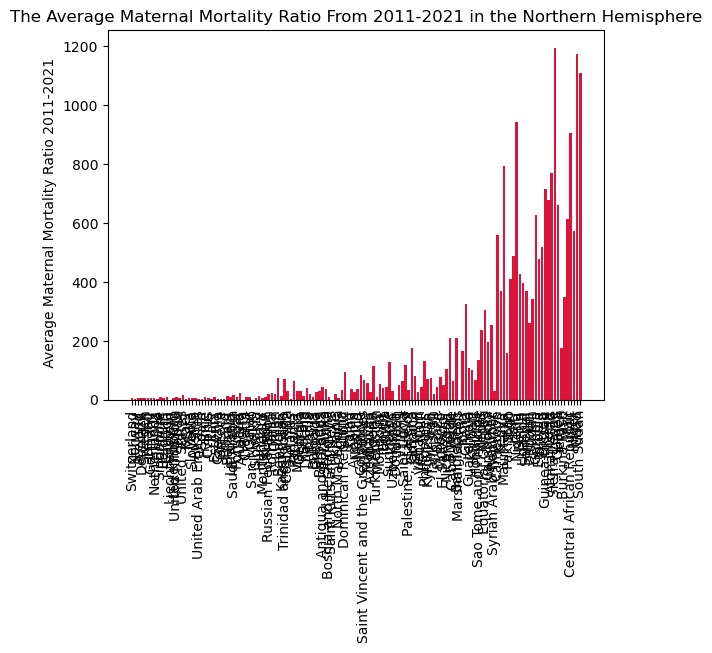

In [86]:
plt.bar(North_df['Country'], North_df['Maternal Mortality Ratio (deaths per 100,000 live births) Average (2011-2021)'], color="crimson")
plt.xticks(rotation="vertical")
plt.ylabel(" Average Maternal Mortality Ratio 2011-2021")
plt.title("The Average Maternal Mortality Ratio From 2011-2021 in the Northern Hemisphere")
# plt.savefig("fig.1.png")
plt.show

In [66]:
South_df=Main_Dataset_Clean.filter(pl.col('Hemisphere')=="Southern Hemisphere")
# South_df

<function matplotlib.pyplot.show(close=None, block=None)>

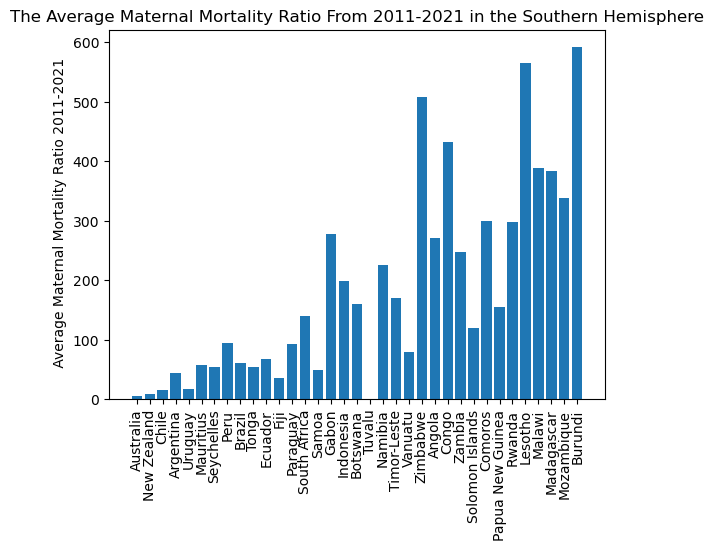

In [85]:
plt.bar(South_df['Country'], South_df['Maternal Mortality Ratio (deaths per 100,000 live births) Average (2011-2021)'])
plt.xticks(rotation="vertical")
plt.ylabel(" Average Maternal Mortality Ratio 2011-2021")
plt.title("The Average Maternal Mortality Ratio From 2011-2021 in the Southern Hemisphere")
plt.savefig("fig.1.png")
plt.show

In [67]:
Main_Dataset_Clean.write_csv('Main_Dataset.csv')

In [72]:
GI_join.write_csv('Gender_Inequality_Decade Data.csv')

In [73]:
MM_join.write_csv('Maternal_Mortality_Decade_Data.csv')

In [70]:
South_df.write_csv('Southern_Hemisphere_Data.csv')

In [71]:
North_df.write_csv('Northern_Hemisphere_Data.csv')